## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [2]:
data_frame = pd.read_csv("Data.csv")

In [5]:
data_frame

,Annual income
0,117313.0
1,104002.0
2,113038.0
3,101936.0
4,84560.0
5,113136.0
6,80740.0
7,100536.0
8,105052.0
9,87201.0


## Mean

In [6]:
data_frame.mean()

Annual income    100200.366667
dtype: float64

## Median

In [7]:
data_frame.median()

Annual income    101236.0
dtype: float64

In [8]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [10]:
means = []

i=0

#confidence interval shrinks with more samples
while i<10000:
    means.append(resample(data_frame, replace=True, n_samples=len(data_frame)).mean())
    i+=1

In [11]:
df_means = pd.DataFrame(means)

In [12]:
df_means.sort_values(by='Annual income', inplace=True)

In [13]:
df_means

,Annual income
8648,91891.566667
7555,92320.200000
5631,92790.566667
5727,92948.066667
1775,93159.066667
5040,93246.866667
5569,93486.366667
1462,93488.300000
9754,93660.100000
8041,93756.666667


In [14]:
# out of bag observations
#oob = [x for x in data_frame if x not in df_means]

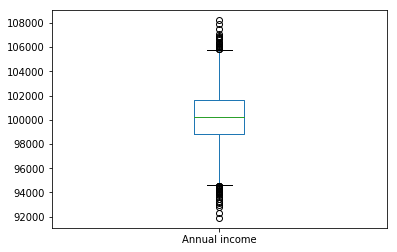

In [15]:
df_means.plot.box()

In [16]:
# if we chose 5th and 95th percentile, we are eliminating 5% data on left and 5% data on right. 
# Total we are eliminating 10% of the data. We need to eliminate 5% of the data 
# We need to use the range 0.025 to 0.975 to elimiate 2.5% data on left and 2.5% data on right

confidence_interval = df_means.quantile([0.05 - 0.025, 0.95 + 0.025])

In [19]:
confidence_interval

,Annual income
0.025,96171.065833
0.975,104157.413333


In [17]:
lower_interval = confidence_interval.iloc[0,0]
upper_interval = confidence_interval.iloc[1,0]

print(lower_interval, upper_interval)

96171.06583333334 104157.41333333333


In [18]:
data_frame.mean().iloc[0]

100200.36666666667

In [20]:
if data_frame.mean().iloc[0] >= lower_interval and data_frame.mean().iloc[0] <= upper_interval:
    print('The true mean {} is between the confidence interval of {} and {}'.format(data_frame.mean().iloc[0], confidence_interval.iloc[0,0], confidence_interval.iloc[1,0]))

The true mean 100200.36666666667 is between the confidence interval of 96171.06583333334 and 104157.41333333333


C:\Users\manuj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


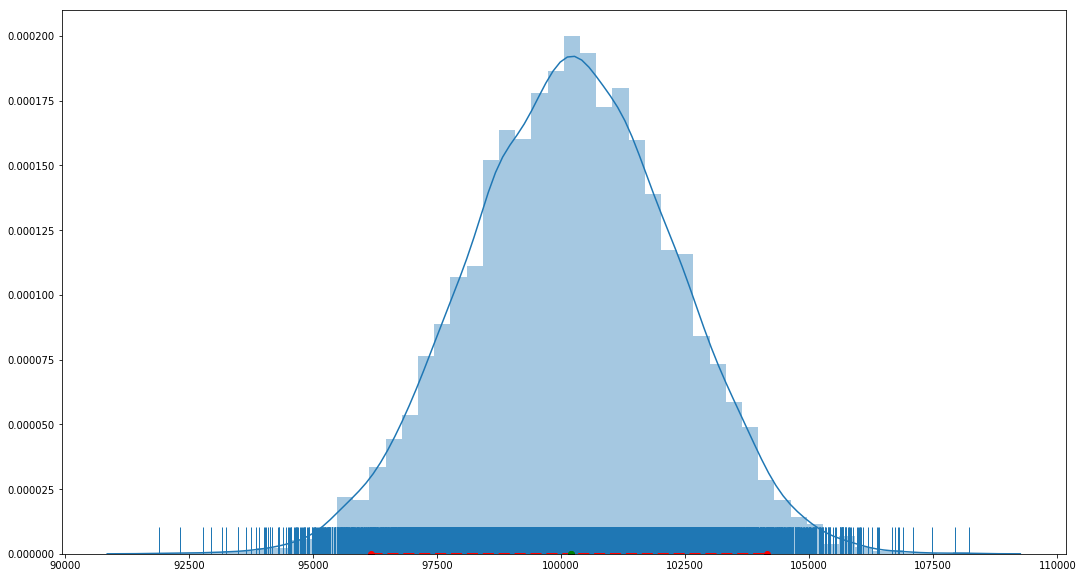

In [21]:
fig, ax = plt.subplots(figsize=(18,10)) # figsize in inches
sns.distplot(df_means, rug=True)
#sns.boxplot(data=df_means, orient="h", notch=True)

#wierd
x1 = [lower_interval, upper_interval]
x2 = [0.0, 0.0]    

ax.plot(x1, x2, 'red', linestyle='--', marker='o', lw=3)


y1 = [data_frame.mean().iloc[0], data_frame.mean().iloc[0]]
y2 = [0.0, 0.0]


ax.plot(y1, y2, 'green', linestyle='--', marker='o', lw=3)

# How many means are within the confidence interval?

In [22]:
df_means['isInInterval'] = df_means['Annual income'].apply(lambda x : x >= lower_interval and x <= upper_interval)

In [23]:
df_means.head()

,Annual income,isInInterval
8648,91891.566667,False
7555,92320.200000,False
5631,92790.566667,False
5727,92948.066667,False
1775,93159.066667,False


In [26]:
(sum(df_means['isInInterval']) / len(df_means))*100

95.0

### Bam!

## Verify

In [3]:
from scipy import stats

In [6]:
# Calculate Confidence intervals when Population variance is known using z-score (normal distribution)

mean, sigma = data_frame.mean().iloc[0], 15000

# Sample standard error
#standard_error = stats.sem(data_frame)[0] #sem = standard error of means

#population standard error
standard_error = sigma / np.sqrt(len(data_frame))

conf_int = stats.norm.interval(0.99, loc=mean, scale=standard_error)

In [7]:
conf_int

(93146.1675974839, 107254.56573584944)

For large sample size n, the sample mean is normally distributed, and one can calculate its confidence interval using st.norm.interval(). But the t- solutions are correct also for small n, where st.norm.interval() gives confidence intervals that are too narrow (i.e., "fake confidence").